# Multi part introductory Data Science workshop 

## Real estate appraisal using machine learning

[https://github.com/NaeuralEdgeProtocol/DS101-2024](https://github.com/NaeuralEdgeProtocol/DS101-2024)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from utils import set_pretty_prints, load_dataset

In [2]:
set_pretty_prints()

In [3]:
df = load_dataset('imobiliare.ro')

In [4]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAU700006?lista=2349706&listing=1
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001O?lista=2349706&listing=1
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001K?lista=2349706&listing=1
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/bucuresti/rahova/garsoniera-de-vanzare-XAG00001J?lista=2349706&listing=1
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/p-ta-presei-libere/apartament-de-vanzare-3-camere-XB0V00003?lista=2349706&listing=1
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/crangasi/apartament-de-vanzare-4-camere-X5LL10023?lista=2349706&listing=1
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/central/apartament-de-vanzare-3-camere-X9I6100JP?lista=2349706&listing=1
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/apusului/apartament-de-vanzare-2-camere-XBJG000HP?lista=2349706&listing=1
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/theodor-pallady/penthouse-de-vanzare-4-camere-XANO10193?lista=2349706&listing=1


In [5]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']

In [6]:
# TODO: select viable features
START = 1
END = 9
X = df.iloc[:,START:END]
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [7]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

In [8]:
y_price.mean()

134925.4898454077

Text(0.5, 1.0, 'Distribution of prices')

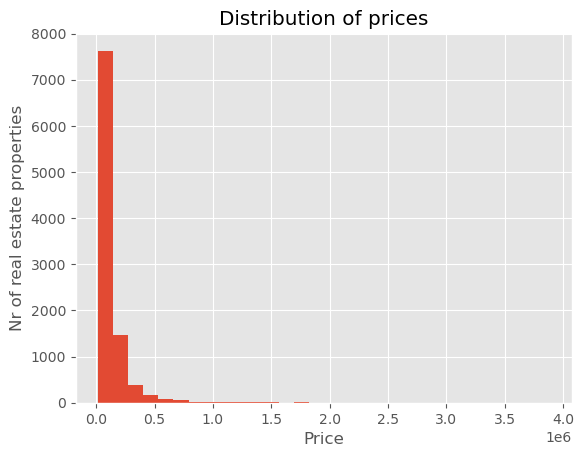

In [9]:
x_label = "Price"
y_label = "Nr of real estate properties"
title = "Distribution of prices"
y_price.hist(bins=30)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

In [10]:
def dummy_model(inputs):
  return y_price.mean() * np.ones(len(inputs))

In [11]:
def plot_feature(feat, x_label, y_label, title, bins=30):
  plt.figure()
  X[feat].hist(bins=bins)
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  plt.title(title)


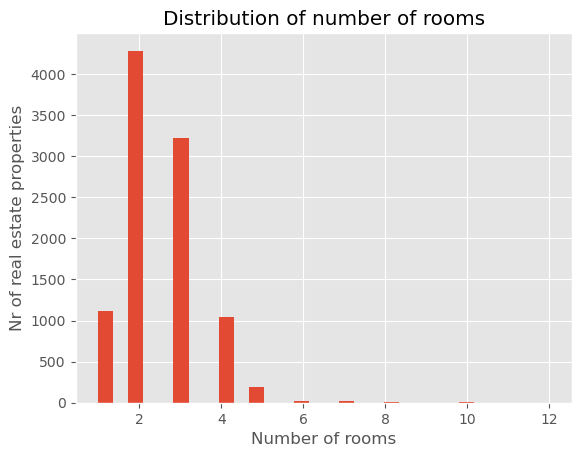

In [12]:
plot_feature("nr cam", "Number of rooms", "Nr of real estate properties", "Distribution of number of rooms")

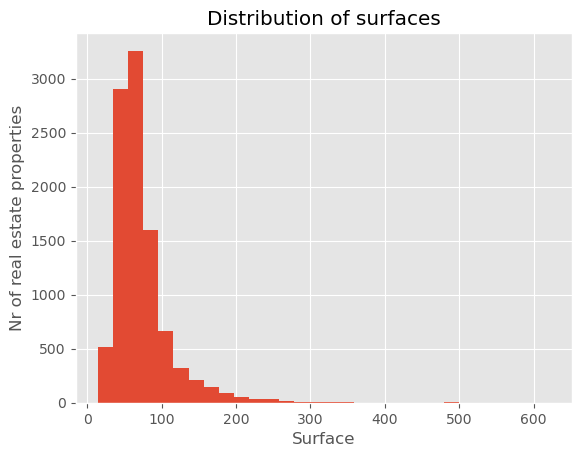

In [13]:
plot_feature("mp", "Surface", "Nr of real estate properties", "Distribution of surfaces")

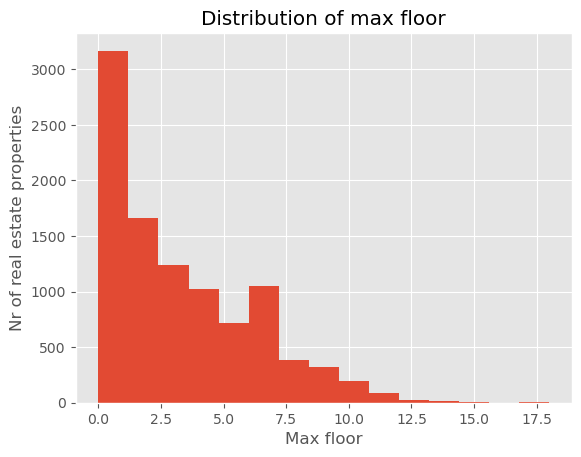

In [14]:
plot_feature("etaj max", "Max floor", "Nr of real estate properties", "Distribution of max floor", bins=15)

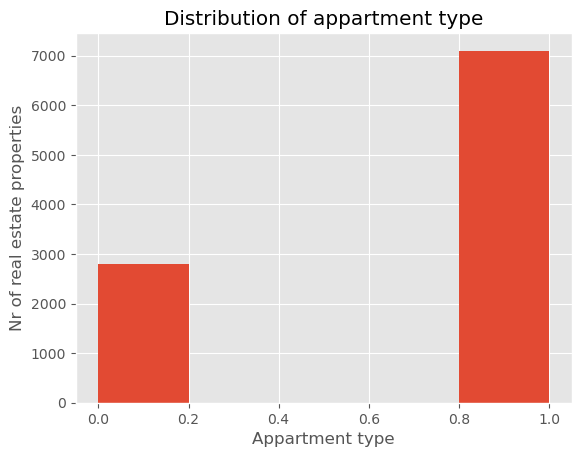

In [15]:
plot_feature("typ_decom", "Appartment type", "Nr of real estate properties", "Distribution of appartment type", bins=5)

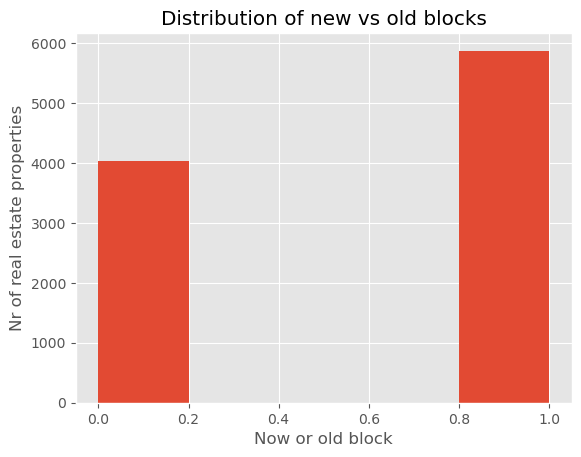

In [16]:
plot_feature("bloc nou", "Now or old block", "Nr of real estate properties", "Distribution of new vs old blocks", bins=5)

### Now lets have a look at the correlation between different features.

In [17]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [18]:
x_features = list(df.columns[START:END])
x_features

['nr cam',
 'mp',
 'parter',
 'et1-2',
 'et3+',
 'etaj max',
 'typ_decom',
 'bloc nou']

In [19]:
df[x_features + ['Price']].corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


## Finally the model

```
f(x) = a*x + b
f(x) = y
F(x) = w*x + w0*1 => F(x) = w'*x' where w' = [w1, w2 ..., wn, wn+1] and x = [x1, x2, ..., xn, 1]

x^-1y=1*w 

=> ((x^Tx)^(-1)x^Ty = w (in this case we need to use pseudo inverse)

=> (x^Tx + λI)^(-1)x^Ty = w (no need for pseudo inverse)
```


In [ ]:
np_X = X.values
np_y = y_price.values

In [23]:
np_X

array([[  2.  ,  56.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  57.  ,   0.  ,   1.  ,   0.  ,   2.  ,   0.  ,   1.  ],
       [  2.  ,  67.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  1.  ,  48.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  3.  ,  89.6 ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   4.  ,   1.  ,   1.  ],
       [  6.  , 334.  ,   0.  ,   0.  ,   1.  ,  10.  ,   1.  ,   1.  ],
       [  3.  , 104.26,   0.  ,   0.  ,   1.  ,  11.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  43.02,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ],
       [  3.  ,  80.23,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  30.  ,   1.  ,   0.  ,   0.  ,   0

In [21]:
lambd = 0.1
np_w1 = np.linalg.pinv(np_X.T.dot(np_X)).dot(np_X.T).dot(np_y)
np_w2 = np.linalg.inv(np_X.T.dot(np_X)  + lambd * np.eye(np_X.shape[1])).dot(np_X.T).dot(np_y)

np_y_hat1 = np_X.dot(np_w1)
np_y_hat2 = np_X.dot(np_w2)


In [22]:
print(np_w1)
print(np_w2)

[-35253.17   4068.76 -77652.97 -77536.51 -76809.97   2762.81 -18637.49   7934.74]
[-35261.62   4068.82 -77620.45 -77504.48 -76771.76   2760.8  -18643.85   7926.48]


In [24]:
err1 = np.mean(np.abs(np_y - np_y_hat1))
err2 = np.mean(np.abs(np_y - np_y_hat2))
print(err1)
print(err2)

51037.602741483846
51036.189738878966


In [25]:
np_X

array([[  2.  ,  56.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  57.  ,   0.  ,   1.  ,   0.  ,   2.  ,   0.  ,   1.  ],
       [  2.  ,  67.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  1.  ,  48.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  3.  ,  89.6 ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   4.  ,   1.  ,   1.  ],
       [  6.  , 334.  ,   0.  ,   0.  ,   1.  ,  10.  ,   1.  ,   1.  ],
       [  3.  , 104.26,   0.  ,   0.  ,   1.  ,  11.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  43.02,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ],
       [  3.  ,  80.23,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  30.  ,   1.  ,   0.  ,   0.  ,   0

In [26]:
np_X.mean(axis=0)


array([ 2.51, 73.7 ,  0.13,  0.36,  0.51,  3.34,  0.72,  0.59])

In [27]:
np_X_n = (np_X - np_X.mean(axis=0)) / np_X.std(axis=0)
np_X_n

array([[-0.53, -0.44, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.42, -0.38,  1.33, -1.03, -0.47, -1.59,  0.83],
       [-0.53, -0.17, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-1.58, -0.64, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 0.52,  0.4 , -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98,  0.24,  0.63,  0.83],
       [ 3.68,  6.48, -0.38, -0.75,  0.98,  2.36,  0.63,  0.83],
       [ 0.52,  0.76, -0.38, -0.75,  0.98,  2.72,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.83, -1.59,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -0.76,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [ 0.52,  0.16, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -1.09,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [-0.53, -0.19, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 1.57,  0.42, -0.

Text(0, 0.5, 'Nr of real estate properties')

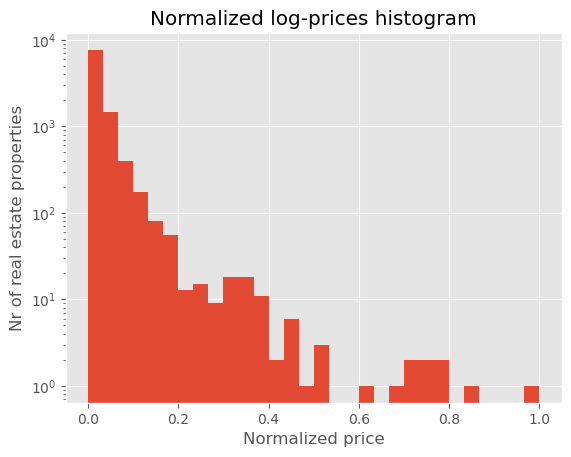

In [28]:
np_y_min = np_y.min()
np_y_max = np_y.max()
np_y_n = (np_y - np_y_min) / (np_y_max - np_y_min)
plt.hist(np_y_n, bins=30, log=True)
plt.title("Normalized log-prices histogram")
plt.xlabel("Normalized price")
plt.ylabel("Nr of real estate properties")



In [29]:
lambd = 0.1
np_w1_n = np.linalg.pinv(np_X_n.T.dot(np_X_n)).dot(np_X_n.T).dot(np_y_n)
np_w2_n = np.linalg.inv(np_X_n.T.dot(np_X_n)  + lambd * np.eye(np_X_n.shape[1])).dot(np_X_n.T).dot(np_y_n)

np_y_hat1_n = np_X_n.dot(np_w1_n)
np_y_hat2_n = np_X_n.dot(np_w2_n)

np_y_h1 = np_y_hat1_n * (np_y_max - np_y_min) + np_y_min
np_y_h2 = np_y_hat2_n * (np_y_max - np_y_min) + np_y_min

np.set_printoptions(precision=5)

print(np_w1)
print(np_w2)
print(np_w1_n)
print(np_w2_n)

err1 = np.mean(np.abs(np_y - np_y_h1))
err2 = np.mean(np.abs(np_y - np_y_h2))
print(err1)
print(err2)

[-35253.1655    4068.76228 -77652.96782 -77536.50594 -76809.97109   2762.8097  -18637.4859    7934.74237]
[-35261.62061   4068.82278 -77620.45182 -77504.47821 -76771.76383   2760.79624 -18643.85181   7926.48224]
[-0.00868  0.04232 -0.00003  0.00003  0.00007  0.00202 -0.00217  0.00101]
[-0.00867  0.04232 -0.00003 -0.00004  0.00006  0.00202 -0.00217  0.00101]
125629.2276889646
125630.98691484239


In [30]:
np_X_nb = np.concatenate((np_X_n, np.ones((np_X_n.shape[0], 1))), axis=1)
np_X_nb

array([[-0.53209, -0.44072, -0.37916,  1.32806, -1.02528, -0.47416,  0.62734,  0.8281 ,  1.     ],
       [-0.53209, -0.41582, -0.37916,  1.32806, -1.02528, -0.47416, -1.59404,  0.8281 ,  1.     ],
       [-0.53209, -0.1669 , -0.37916,  1.32806, -1.02528, -0.47416,  0.62734,  0.8281 ,  1.     ],
       [-1.58426, -0.63986, -0.37916,  1.32806, -1.02528, -0.47416,  0.62734,  0.8281 ,  1.     ],
       [ 0.52008,  0.39567, -0.37916, -0.75298,  0.97535, -0.11937,  0.62734,  0.8281 ,  1.     ],
       [-0.53209, -0.21669, -0.37916,  1.32806, -1.02528, -0.47416,  0.62734,  0.8281 ,  1.     ],
       [-0.53209, -0.68964, -0.37916, -0.75298,  0.97535,  0.23541,  0.62734,  0.8281 ,  1.     ],
       [ 3.67658,  6.47938, -0.37916, -0.75298,  0.97535,  2.36412,  0.62734,  0.8281 ,  1.     ],
       [ 0.52008,  0.76059, -0.37916, -0.75298,  0.97535,  2.7189 ,  0.62734,  0.8281 ,  1.     ],
       [-0.53209, -0.21669, -0.37916,  1.32806, -1.02528, -0.82894, -1.59404,  0.8281 ,  1.     ],
       [-0

In [31]:
np_w = np.linalg.inv(np_X_nb.T.dot(np_X_nb) + lambd * np.eye(np_X_nb.shape[1])).dot(np_X_nb.T).dot(np_y_n)
np_w

array([-0.00867,  0.04232, -0.00003, -0.00004,  0.00006,  0.00202, -0.00217,  0.00101,  0.03028])

In [33]:
np_yh = np_X_nb.dot(np_w)
print(np_yh[:50])
np_price = np_yh * (np_y_max - np_y_min) + np_y_min
err = np.mean(np.abs(np_y - np_price))
print(err)

[ 0.01466  0.02054  0.02625  0.01536  0.04184  0.02414  0.00575  0.27694  0.06301  0.02826  0.00503  0.00866  0.03197 -0.00506  0.02541  0.0398   0.04835  0.01466  0.03415  0.01723  0.00517 -0.00163  0.00473  0.0289   0.00575  0.02189  0.02126  0.0394   0.03216  0.03771  0.01407  0.01756  0.12296  0.20453  0.12938  0.01584  0.21191  0.14307  0.16239  0.01527  0.16028 -0.00021  0.02554  0.09784  0.01723  0.00834  0.01978  0.04297  0.02294  0.0182 ]
51037.345547548866


In [34]:
df_result = pd.DataFrame(
    {
        "Gold": np_y,
        "Pred": np_price,
        "Err": ((np.abs(np_y - np_price) / np_y) * 100).round(1)
    }
)
np.set_printoptions(precision=2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_result.head(10)


,Gold,Pred,Err
0,35800,74630.01,108.50
1,35800,97335.18,171.90
2,39600,119385.00,201.50
3,29800,77329.50,159.50
4,112900,179577.26,59.10
5,37400,111247.73,197.50
6,39500,40196.12,1.80
7,2350000,1087545.63,53.70
8,332000,261325.79,21.30
9,39900,127121.48,218.60


In [35]:
df_result.tail(10)

,Gold,Pred,Err
9887,47000,43073.78,8.40
9888,34500,-28457.74,182.50
9889,56000,28301.71,49.50
9890,101000,139728.18,38.30
9891,79524,88870.23,11.80
9892,85000,170470.81,100.60
9893,134999,166739.67,23.50
9894,59000,59034.10,0.10
9895,110000,120771.28,9.80
9896,61500,30689.70,50.10


# Make the experiment more close to reality

 - Create some helper/utility functions
 - Divide data into training and model testing
 - Repeat the experiment

In [36]:
np.set_printoptions(precision=5)
np_X_nb.mean(axis=0)[:-1]

array([-0., -0.,  0.,  0., -0.,  0.,  0.,  0.])

In [37]:
np.set_printoptions(precision=2)

In [55]:
def train_model_with_normal_eq(inputs, outputs, lmbd=0.1):
  assert inputs.mean(axis=0)[:-1].max() < 1e-8, "Features should be normalized"
  assert inputs[:, -1].sum() == inputs.shape[0], "Bias should be added"
  weights = np.linalg.inv(inputs.T.dot(inputs) + lmbd * np.eye(inputs.shape[1])).dot(inputs.T).dot(outputs)
  return weights


def evaluate(weights, inputs, gold, min_price=None, max_price=None):
  assert inputs.mean(axis=0)[:-1].max() < 1e-8, "Features should be normalized"
  assert inputs[:, -1].sum() == inputs.shape[0], "Bias should be added"
  if gold.max() > 1:
    min_price = gold.min()
    max_price = gold.max()
    gold_scaled = gold.copy()
    gold_scaled = (gold_scaled - min_price) / (max_price - min_price)      
  else:
    gold_scaled = gold * (max_price - min_price) + min_price
    
  _y_h = inputs.dot(weights)
  price = _y_h * (max_price - min_price) + min_price
  err = np.mean(np.abs(gold - price))
  prc = ((np.abs(gold - price) / gold) * 100).round(1)
  df_result = pd.DataFrame(
      {
          "Gold": gold,
          "Pred": price,
          "Err%": prc
      }
  )
  print(f"Mean error: {err}")
  print(df_result.head(10))
  print(df_result.tail(10))  
  return  


dct_field_mapping = [
  'nr_cam', 
  'mp', 
  'parter', 
  'et12',
  'et3',
  'etaj_max',
  'typ_decom',
  'bloc_nou'
]

def save_linear_model(weights, input_transform, output_transform, use_bias, path, field_mapping):
  dct_to_save = {
    "weights": weights,
    "input_transform": input_transform,
    "output_transform": output_transform,
    "use_bias" : use_bias,
    "field_mapping": field_mapping
  }
  np.save(path, dct_to_save)
  return

def load_linear_model(path):
  data = np.load(path, allow_pickle=True).item()
  return data

In [56]:
x_transform = np_X.mean(axis=0), np_X.std(axis=0)
y_transform = np_y.min(), np_y.max()
# now we will save the model, reload it, test it and see if it matches 
# the initial training as a sanity check then we can use it in app
print(x_features)
save_linear_model(
  weights=np_w,
  input_transform=x_transform,
  output_transform=y_transform,
  use_bias=True,
  path="linear_model_nb_v1.npy",
  field_mapping=dct_field_mapping
)


['nr cam', 'mp', 'parter', 'et1-2', 'et3+', 'etaj max', 'typ_decom', 'bloc nou']


In [57]:
loaded_data = load_linear_model("linear_model_nb_v1.npy")
print(loaded_data)


{'weights': array([-0.01,  0.04, -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.03]), 'input_transform': (array([ 2.51, 73.7 ,  0.13,  0.36,  0.51,  3.34,  0.72,  0.59]), array([ 0.95, 40.17,  0.33,  0.48,  0.5 ,  2.82,  0.45,  0.49])), 'output_transform': (18000, 3880000), 'use_bias': True, 'field_mapping': ['nr_cam', 'mp', 'parter', 'et12', 'et3', 'etaj_max', 'typ_decom', 'bloc_nou']}


In [59]:
np_load_w = loaded_data["weights"]
np_load_x_mean, np_load_x_std = loaded_data["input_transform"]
np_load_y_min, np_load_y_max = loaded_data["output_transform"]
use_bias = loaded_data["use_bias"]

np_load_X = (np_X - np_load_x_mean) / np_load_x_std
np_load_X = np.concatenate((np_load_X, np.ones((np_load_X.shape[0], 1))), axis=1)

evaluate(
  weights=np_load_w,
  inputs=np_load_X,
  gold=np_y,
  min_price=np_load_y_min,
  max_price=np_load_y_max
)


test_data = np.array([[-1.58425752, -1.78490907,  2.63738275,  1.32806368, -1.02527641,  2.00933293,   0.62733652, -1.20758902,  1.        ]])

yh = test_data.dot(np_w)
price = yh * (np_y_max - np_y_min) + np_y_min
price


Mean error: 51037.345547548866
      Gold       Pred   Err%
0    35800   74630.01 108.50
1    35800   97335.18 171.90
2    39600  119385.00 201.50
3    29800   77329.50 159.50
4   112900  179577.26  59.10
5    37400  111247.73 197.50
6    39500   40196.12   1.80
7  2350000 1087545.63  53.70
8   332000  261325.79  21.30
9    39900  127121.48 218.60
        Gold      Pred   Err%
9887   47000  43073.78   8.40
9888   34500 -28457.74 182.50
9889   56000  28301.71  49.50
9890  101000 139728.18  38.30
9891   79524  88870.23  11.80
9892   85000 170470.81 100.60
9893  134999 166739.67  23.50
9894   59000  59034.10   0.10
9895  110000 120771.28   9.80
9896   61500  30689.70  50.10


array([-98826.2])

## Model advancement

Last time we operationalized the model using the `real_estate_app` module via transfering the model. Now lets move forward with the model and progress with the app in the same time.